In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
data_path = '/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/data/pvCLCL_20000103_20201231.csv'
df_pvCLCL = pd.read_csv(data_path, index_col=0)

In [66]:
n_null = df_pvCLCL.isna().sum().sum()
print('total number of null values: ', n_null)
print(f'proportion of null values: {n_null/df_pvCLCL.size:.3g}' )

total number of null values:  15
proportion of null values: 4.09e-06


In [67]:
for ticker, row in df_pvCLCL.iterrows():
    for date in df_pvCLCL.columns:
        if pd.isnull(row[date]):
            print(f"Null value at ticker {ticker} and date {date}")

Null value at ticker AA and date X20161101
Null value at ticker BF and date X20000607
Null value at ticker CP and date X20011003
Null value at ticker EWU and date X20140929
Null value at ticker FAF and date X20100602
Null value at ticker GCI and date X20150629
Null value at ticker IGT and date X20150407
Null value at ticker IQI and date X20100601
Null value at ticker KGC and date X20030203
Null value at ticker KMX and date X20021001
Null value at ticker NX and date X20080424
Null value at ticker OIA and date X20100601
Null value at ticker PHG and date X20000801
Null value at ticker PNR and date X20121001
Null value at ticker TSM and date X20000602


In [68]:
df_pvCLCL.fillna(0,inplace=True)

In [69]:
df_pvCLCL[df_pvCLCL.eq(0).mean(axis=1)>0.5].index

Index([], dtype='object', name='ticker')

In [70]:
df_pvCLCL.loc[:,df_pvCLCL.eq(0).mean(axis=0)>0.1].columns

Index(['X20000201', 'X20000204', 'X20000207', 'X20000210', 'X20000217',
       'X20000228', 'X20000302', 'X20000308', 'X20000310', 'X20000320',
       'X20000321', 'X20000327', 'X20000411', 'X20000424', 'X20000427',
       'X20000504', 'X20000505', 'X20000509', 'X20000518', 'X20000524',
       'X20000525', 'X20000526', 'X20000608', 'X20000609', 'X20000615',
       'X20000619', 'X20000621', 'X20000622', 'X20000623', 'X20000710',
       'X20000714', 'X20000719', 'X20000720', 'X20000721', 'X20000724',
       'X20000725', 'X20000727', 'X20000801', 'X20000804', 'X20000807',
       'X20000808', 'X20000809', 'X20000810', 'X20000814', 'X20000815',
       'X20000817', 'X20000818', 'X20000822', 'X20000824', 'X20000825',
       'X20000828', 'X20000829', 'X20000830', 'X20000831', 'X20000901',
       'X20000905', 'X20000906', 'X20000907', 'X20000911', 'X20000912',
       'X20000913', 'X20000919', 'X20000920', 'X20000921', 'X20001004',
       'X20001005', 'X20001010', 'X20001027', 'X20001103', 'X200

In [71]:
len(df_pvCLCL.loc[:,df_pvCLCL.eq(0).mean(axis=0)>0.1].columns)

74

In [72]:
proportion = (df_pvCLCL>1).mean()
proportion[proportion>0.1].index

Index([], dtype='object')

No ticker has more than 50% of zero returns, 74 dates has more than 10% of zero returns, no dates has more than 10% of returns higher than 100%.

Now we remove the  74 dates.

In [73]:
df_pvCLCL = df_pvCLCL.loc[:,df_pvCLCL.eq(0).mean(axis=0)<=0.1]

In [74]:
df_pvCLCL.to_csv('pvCLCL_clean.csv')

In [8]:
df_pvCLCL = pd.read_csv('../../data/pvCLCL_clean.csv', index_col=0)

In [10]:
df_pvCLCL_excess = df_pvCLCL - df_pvCLCL.loc['SPY']
df_pvCLCL_excess.drop('SPY',inplace=True)

In [12]:
df_pvCLCL_excess.to_csv('../../data/pvCLCL_excess_clean.csv')

Column number of the first day of every year

In [16]:
df_pvCLCL.columns = pd.to_datetime(df_pvCLCL.columns.str[1:], format='%Y%m%d')

In [53]:
first_day_cols = []
for col_number, index_value in enumerate(df_pvCLCL.columns):
    if index_value.year != df_pvCLCL.columns[col_number - 1].year:
        first_day_cols.append(col_number)

In [54]:
pd.DataFrame({'first day index':first_day_cols}, index=np.unique(df_pvCLCL.columns.year)).T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
first day index,0,178,425,677,929,1180,1432,1683,1933,2186,...,2690,2942,3191,3443,3695,3947,4199,4450,4700,4952


In [71]:

# Calculate rolling mean with window size of 50
rolling_mean = df_pvCLCL.iloc[:,:500].rolling(window=50, min_periods=50, axis=1).mean().dropna(axis=1)

# Calculate rolling standard deviation with window size of 50
rolling_std = df_pvCLCL.iloc[:,:500].rolling(window=50, min_periods=50, axis=1).std().dropna(axis=1)

# Organize the results in a new DataFrame
result_df = pd.concat([rolling_mean, rolling_std], axis=1, keys=['Rolling Mean', 'Rolling Std'])


(array([106., 126., 232., 112.,  54.,  32.,  18.,   7.,   2.,   6.]),
 array([0.00554255, 0.01248578, 0.01942901, 0.02637224, 0.03331547,
        0.0402587 , 0.04720193, 0.05414516, 0.06108839, 0.06803162,
        0.07497485]),
 <BarContainer object of 10 artists>)

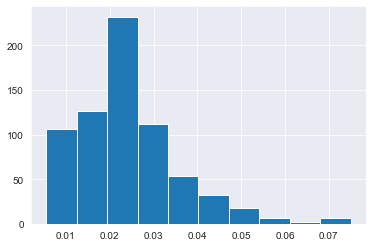

In [79]:
plt.hist(rolling_std.mean(axis=1))  # distribution of std of different stocks

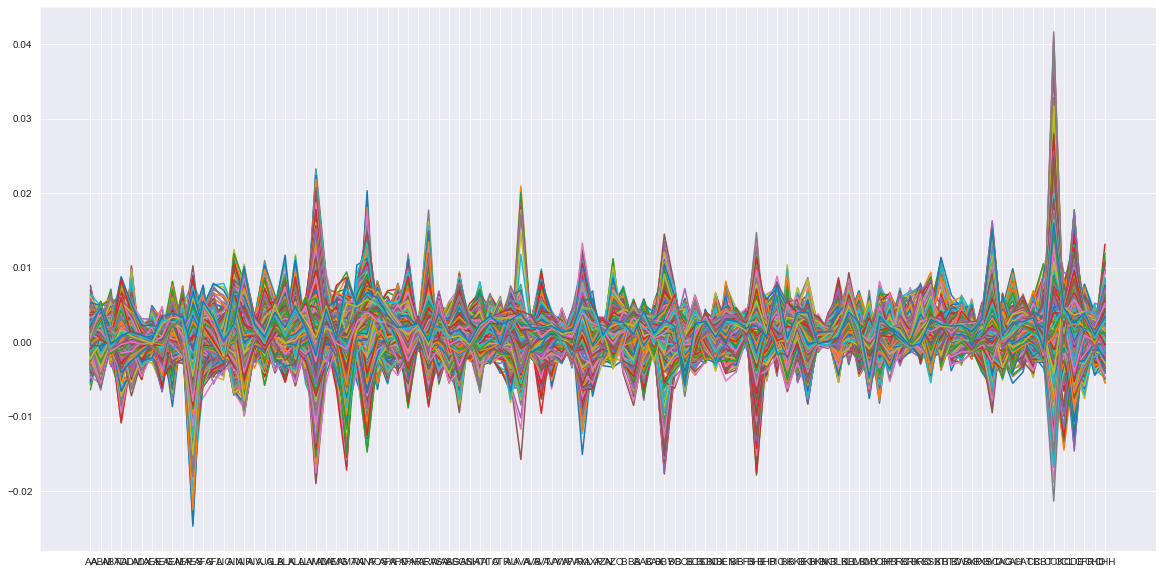

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(rolling_mean.iloc[:100]);

In [105]:
def normalize_by_column(data):

    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data-mean)/std

In [107]:
norm = normalize_by_column(np.array(df.T))
